In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

### Notes

* ISO/ISO3 has three entries (~0.2%) have been wrongly coded as Republic of Congo ('178/COG'). Rest are Democratic Republic of Congo '180/COD'.

* There is a time_precision column. ~90% is 1, 9% is 2 and 1% is 3.  Similarly for geo_precision (55% is 1, 44% is 2 and 1% is 3). Perhaps qualitative scales but not sure how to use.

* There are (actor, associated actor) 1 and 2. Might be useful to map out the network of current conflicting entities.  

* inter1, inter2 and interaction seem to denote actor types. Not using for now. 

* Need to parse out the multiple sources (separated by semi-colon). Also multiple source scales ('National, International, Subnational, Other, Local, Regional) separated by hyphen.

* Some NLP might be required for notes.

* Timestamp field has upload date. Not using for now.


In [2]:
#acled_df = pd.read_excel('../data/acled/ACLED_Ituri-NordKivu_20180802-20190705.xlsx',parse_dates=['event_date'])
acled_df = pd.read_csv('../data/acled/2018-08-02-2019-08-01-Democratic_Republic_of_Congo.csv',parse_dates=['event_date'])
acled_df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [3]:
useful_cols = ['event_id_cnty','event_date','event_type','sub_event_type','actor1','assoc_actor_1','actor2','assoc_actor_2', 'admin1','admin2','admin3','location','latitude','longitude', 'source','source_scale','notes','fatalities']
acled_df = acled_df[useful_cols]

In [4]:
acled_df = acled_df[acled_df.admin1.isin(['Nord-Kivu','Ituri'])]
acled_df['event_date'] = pd.to_datetime(acled_df.event_date)

In [5]:
acled_df['year_week'] = acled_df.event_date.dt.year.astype(str).values + ['W{:02d}'.format(x) for x in  acled_df.event_date.dt.week.values]
acled_df['week_date'] = acled_df.year_week.apply(lambda x: pd.datetime.strptime(x+'w0','%YW%Ww%w'))

Text(0.5, 1.0, 'Events weekly by event type')

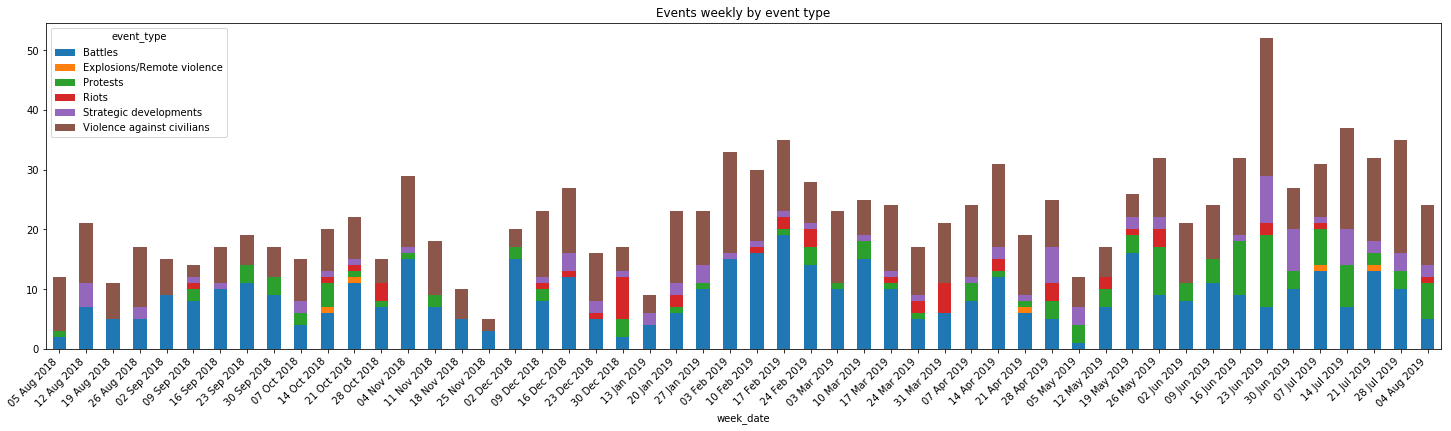

In [6]:
plt.figure(figsize=(25,6))
ax = plt.gca()
temp_df = acled_df.groupby('week_date')['event_type'].value_counts().sort_index().reset_index(name='count').pivot(index='week_date',columns='event_type',values='count').fillna(0)
temp_df.plot(kind='bar',stacked=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax.xaxis.set_major_formatter(plt.FixedFormatter(temp_df.index.to_series().dt.strftime("%d %b %Y")))
plt.title('Events weekly by event type')

In [7]:
key_admin2 = ['Beni','Goma','Butembo','Oicha','Nyiragongo','Mambasa']

Text(0.5, 1.0, 'Events weekly by key admin2')

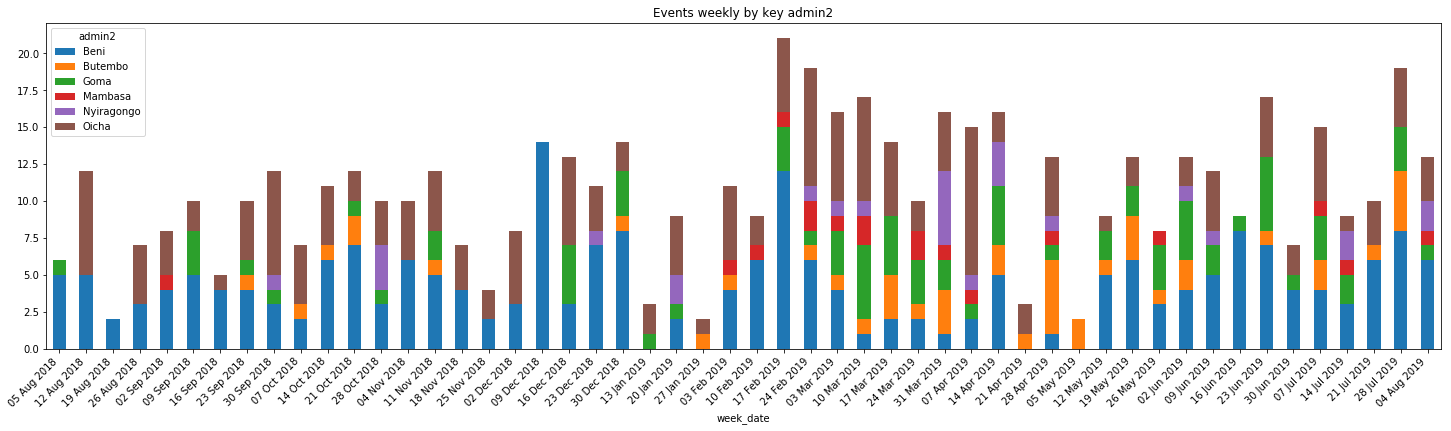

In [8]:
plt.figure(figsize=(25,6))
ax = plt.gca()
temp_df = acled_df[acled_df.admin2.isin(key_admin2)].groupby('week_date')['admin2'].value_counts().sort_index().reset_index(name='count').pivot(index='week_date',columns='admin2',values='count').fillna(0)
temp_df.plot(kind='bar',stacked=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax.xaxis.set_major_formatter(plt.FixedFormatter(temp_df.index.to_series().dt.strftime("%d %b %Y")))

plt.title('Events weekly by key admin2')

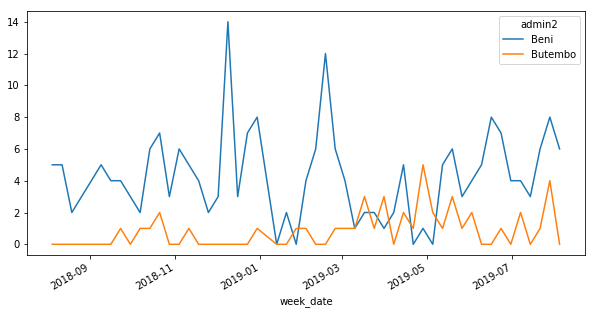

In [12]:
plt.figure(figsize=(10,5))
ax = plt.gca()
temp_df[['Beni','Butembo']].plot(ax=ax)

Text(0.5, 1.0, 'Events weekly by event type')

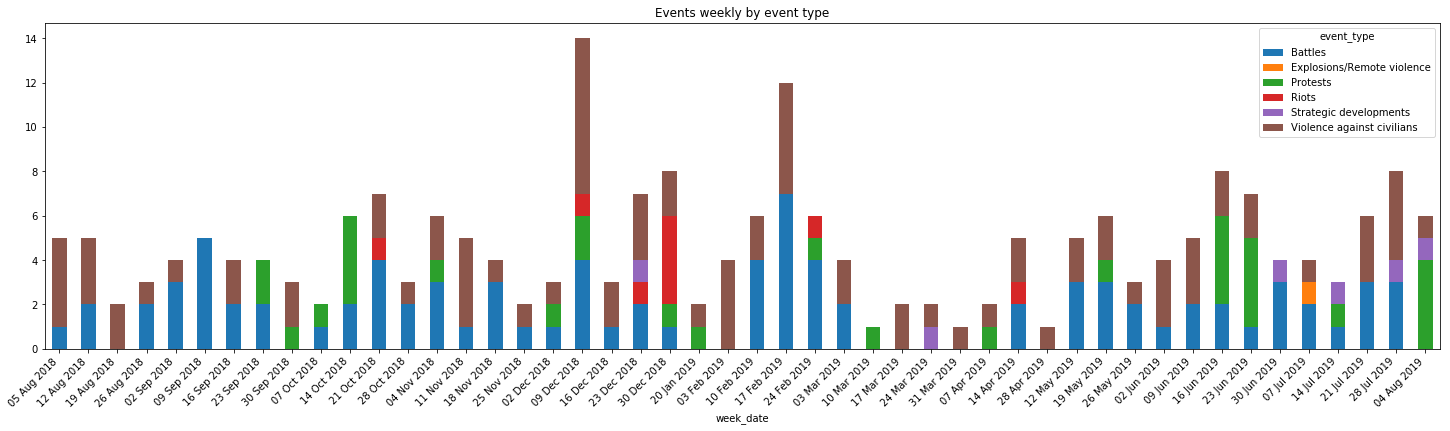

In [16]:
plt.figure(figsize=(25,6))
ax = plt.gca()
temp_df = acled_df[acled_df.admin2=='Beni'].groupby('week_date')['event_type'].value_counts().sort_index().reset_index(name='count').pivot(index='week_date',columns='event_type',values='count').fillna(0)
temp_df.plot(kind='bar',stacked=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax.xaxis.set_major_formatter(plt.FixedFormatter(temp_df.index.to_series().dt.strftime("%d %b %Y")))
plt.title('Events weekly by event type - Beni')

Text(0.5, 1.0, 'Events weekly by event type - Butembo')

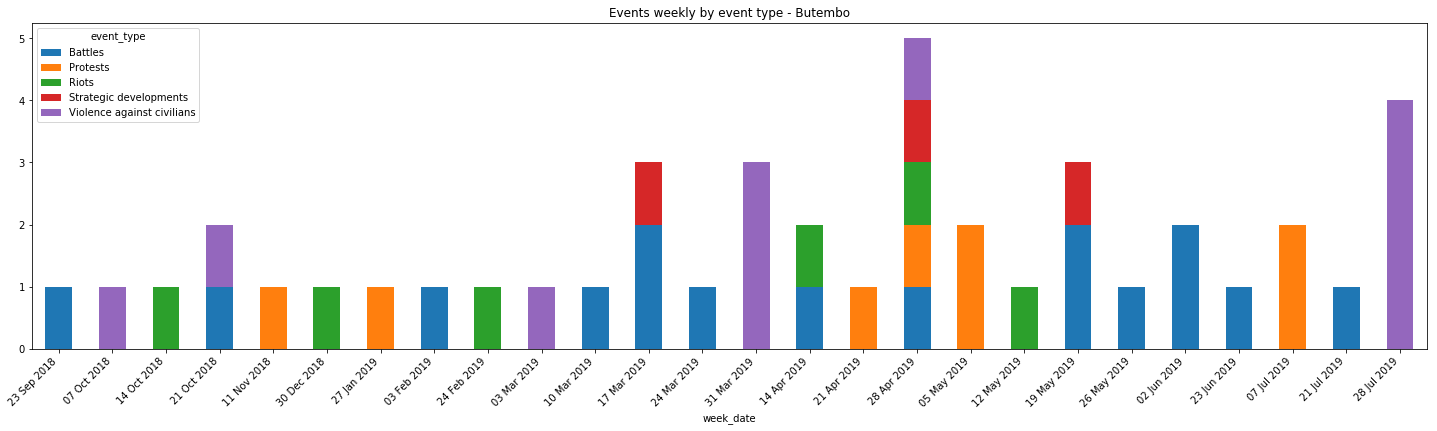

In [17]:
plt.figure(figsize=(25,6))
ax = plt.gca()
temp_df = acled_df[acled_df.admin2=='Butembo'].groupby('week_date')['event_type'].value_counts().sort_index().reset_index(name='count').pivot(index='week_date',columns='event_type',values='count').fillna(0)
temp_df.plot(kind='bar',stacked=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
ax.xaxis.set_major_formatter(plt.FixedFormatter(temp_df.index.to_series().dt.strftime("%d %b %Y")))
plt.title('Events weekly by event type - Butembo')

In [10]:
print(acled_df[(acled_df.event_date>=pd.datetime.strptime('2019-07-01','%Y-%m-%d'))&(acled_df.admin2=='Beni')].notes.values)

['On 27 July, in Beni, an unspecified number of residents protested against insecurity in the area and ADF attacks by maintaining "vile morte". [size=no report]'
 'On 26 July, in Beni, unspecified number of residents protested against insecurity in the area and ADF attacks by maintaining "vile morte". [size=no report]'
 'On 25 July, in Beni, an unspecified number of residents and local journalists gathered to protest against insecurity and ADF attacks. It was decided to maintain "vile morte" on 26th and 27th July in Beni. [size=no report]'
 'On 24 July, in Beni area, ADF has appeared in IS video from its "Central African Province".'
 'On 24 July, in Beni, an unspecified number of residents protested against insecurity in the area and ADF attacks by maintaining "vile morte". [size=no report]'
 'On 24 July, in Beni, ADF has attacked civilians killing 4 and kidnapping 4.'
 'On 21 July, in Masulukwede, the ADF attacked the FARDC. The attack was repelled resulting in 4 ADF killed. FARDC rec